In [34]:
import os
import pandas as pd
from functools import reduce
import numpy as np
from datetime import date
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


In [35]:
df=pd.read_csv("C:/Users/91966/OneDrive/Desktop/capstone/telangana/weather/daily_weather_data.csv")
df=df[['district','odate','rainfall','temp_min','temp_max']].dropna()

In [36]:
df1=df.copy(deep=True)
df2=df.copy(deep=True)
df3=df.copy(deep=True)
df1['odate'] = pd.to_datetime(df1['odate'], format='%d-%m-%Y', errors='coerce')
df1.dropna(inplace=True)
df2['odate'] = pd.to_datetime(df2['odate'], format='%Y-%m-%d', errors='coerce')
df2.dropna(inplace=True)
df3['odate'] = pd.to_datetime(df3['odate'], format='%d-%b-%y', errors='coerce')
df3.dropna(inplace=True)

In [37]:
df_final=pd.concat([df1,df2,df3],axis=0).sort_index()
df_final=df_final.sort_values(by='odate')

In [38]:
df_comps={}
options=["Adilabad","Nizamabad","Warangal","Karimnagar","Khammam"]
for i in options:
  df_comps[i]=df_final[df_final["district"]==i]

In [39]:
df_comps['Adilabad']=df_comps['Adilabad'][['odate','temp_max']]
df_comps['Adilabad']

,odate,temp_max
0,2018-01-01,29.7
6706,2018-01-01,29.3
6339,2018-01-01,29.3
5945,2018-01-01,29.6
5580,2018-01-01,33.0
...,...,...
1033119,2022-09-30,31.4
1033938,2022-09-30,32.7
1030389,2022-09-30,33.7
1030116,2022-09-30,32.7


In [40]:

df=df_comps['Adilabad']
df=df.set_index('odate')
df

,temp_max
odate,
2018-01-01,29.7
2018-01-01,29.3
2018-01-01,29.3
2018-01-01,29.6
2018-01-01,33.0
...,...
2022-09-30,31.4
2022-09-30,32.7
2022-09-30,33.7


In [41]:
# # Put your inputs into a single list
# df['single_input_vector'] = df[['temp_max']].apply(tuple, axis=1).apply(list)
# # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
# df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# # Use .cumsum() to include previous row vectors in the current row list of vectors
# df['cumulative_input_vectors'] = df.single_input_vector.cumsum()

In [42]:
train, test = train_test_split(df, test_size=0.3)

In [43]:

train=train.sort_index()

test=test.sort_index()
train

,temp_max
odate,
2018-01-01,32.5
2018-01-01,32.1
2018-01-01,33.5
2018-01-01,29.5
2018-01-01,30.1
...,...
2022-09-30,32.5
2022-09-30,33.8
2022-09-30,30.8


In [73]:
scalar=MinMaxScaler()
scalar.fit(train)
train_scaled=scalar.transform(train)
test_scaled=scalar.transform(test)


In [45]:
n_input=32
n_features=1
generator=TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=25)

In [46]:
# def get_model(params, input_shape):
# 	model = Sequential()
# 	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(n_input,n_features)))
# 	model.add(Dropout(rate=params["dropout"]))

# 	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
# 	model.add(Dropout(rate=params["dropout"]))

# 	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
# 	model.add(Dropout(rate=params["dropout"]))

# 	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
# 	model.add(Dropout(rate=params["dropout"]))

# 	model.add(Dense(1))

# 	model.compile(loss=params["loss"],
#               	optimizer=params["optimizer"],
#               	metrics=[MeanAbsoluteError()])

# 	return model

In [78]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [48]:
# params = {
# 	"loss": "mean_absolute_error",
# 	"optimizer": "adam",
# 	"dropout": 0.2,
# 	"lstm_units": 90,
# 	"epochs": 30,
# 	"batch_size": 128,
# 	"es_patience" : 10
# }

# model = get_model(params=params,input_shape=(n_input,n_features))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [53]:
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error',
#                                            	mode='min',
# patience=params["es_patience"])

In [54]:
# model.fit(
# 	generator,
# 	epochs=params["epochs"],
# 	batch_size=params["batch_size"],
# 	verbose=1,
# 	callbacks=[es_callback]
# )

Epoch 1/30
916/916 [==============================] - 74s 81ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 2/30
916/916 [==============================] - 64s 70ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 3/30
916/916 [==============================] - 66s 72ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 4/30
916/916 [==============================] - 64s 70ms/step - loss: 0.0415 - mean_absolute_error: 0.0415
Epoch 5/30
916/916 [==============================] - 65s 71ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 6/30
916/916 [==============================] - 65s 71ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 7/30
916/916 [==============================] - 66s 72ms/step - loss: 0.0411 - mean_absolute_error: 0.0411
Epoch 8/30
916/916 [==============================] - 68s 74ms/step - loss: 0.0410 - mean_absolute_error: 0.0410
Epoch 9/30
916/916 [==============================] - 65s 71ms/step - loss: 0.0409 - mean_absolu

In [80]:
model.fit(generator,epochs=50)

Epoch 1/50
916/916 [==============================] - 96s 103ms/step - loss: 0.0497
Epoch 2/50
916/916 [==============================] - 100s 110ms/step - loss: 0.0390
Epoch 3/50
916/916 [==============================] - 112s 123ms/step - loss: 0.0382
Epoch 4/50
916/916 [==============================] - 94s 103ms/step - loss: 0.0384
Epoch 5/50
916/916 [==============================] - 111s 121ms/step - loss: 0.0382
Epoch 6/50
916/916 [==============================] - 92s 100ms/step - loss: 0.0382
Epoch 7/50
916/916 [==============================] - 97s 106ms/step - loss: 0.0381
Epoch 8/50
916/916 [==============================] - 97s 106ms/step - loss: 0.0381
Epoch 9/50
916/916 [==============================] - 85s 93ms/step - loss: 0.0379
Epoch 10/50
916/916 [==============================] - 83s 90ms/step - loss: 0.0377
Epoch 11/50
916/916 [==============================] - 82s 89ms/step - loss: 0.0377
Epoch 12/50
916/916 [==============================] - 81s 89ms/step - los

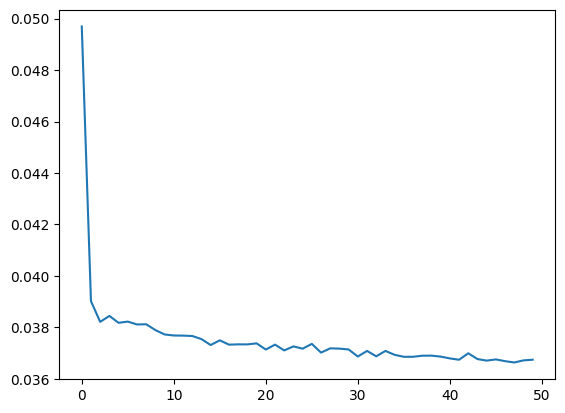

In [81]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [82]:
last_train_batch = train_scaled[-32:]

In [83]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [84]:
model.predict(last_train_batch)

array([[0.51037306]], dtype=float32)

In [85]:
test_predictions = []

first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [87]:

true_predictions = scalar.inverse_transform(test_predictions)

In [88]:
test['Predictions'] = true_predictions

<Axes: xlabel='odate'>

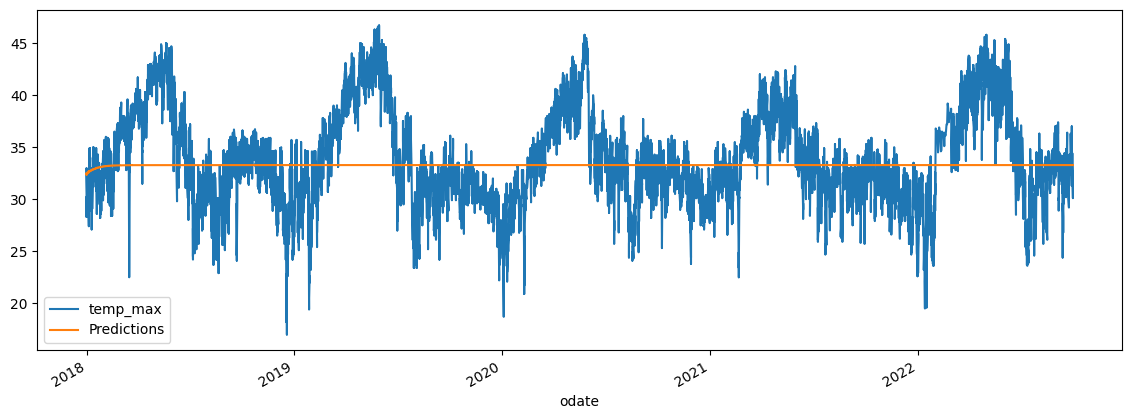

In [89]:
test.plot(figsize=(14,5))